# ARIMA

In [382]:
#pip install pmdarima

In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error
%matplotlib inline

## Explorar Dataset

In [384]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Time-Series/main/Arima/Data/website.csv'

In [385]:
df=pd.read_csv(url,sep=',')

In [386]:
df=pd.DataFrame(df)
df.head()

,traffic
0,932
1,929
2,938
3,964
4,990


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   traffic  393 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [388]:
df.shape

(393, 1)

In [389]:
df.describe()

,traffic
count,393.000000
mean,3046.516539
std,1198.711162
min,913.000000
25%,2039.000000
50%,2802.000000
75%,4355.000000
max,4941.000000


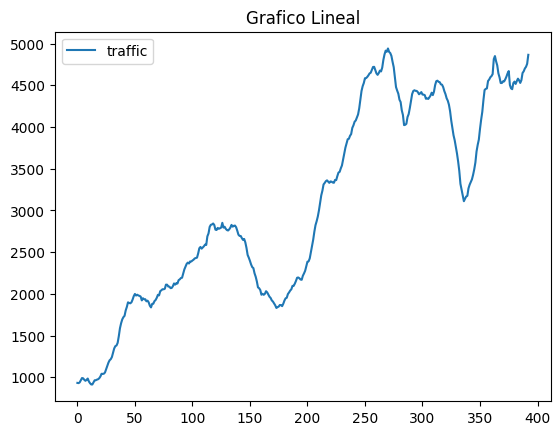

In [390]:
df.plot()
plt.title('Grafico Lineal')
plt.show()

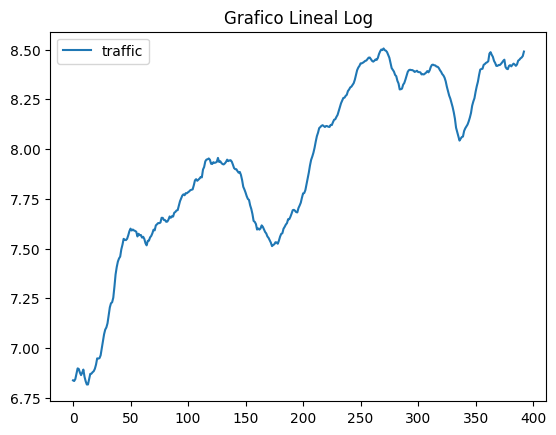

In [391]:
df=np.log(df)
df.plot()
plt.title('Grafico Lineal Log')
plt.show()

In [392]:
msk = (df.index < len(df)-30)
msk

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [393]:
df_test=df[-30:]
df_test

,traffic
363,8.486734
364,8.473659
365,8.463370
366,8.443116
367,8.432506
368,8.417815
369,8.417815
370,8.422223
371,8.422003
372,8.427706


In [394]:
df_train=df[:len(df)-30]
df_train

,traffic
0,6.837333
1,6.834109
2,6.843750
3,6.871091
4,6.897705
...,...
358,8.427050
359,8.432942
360,8.435983
361,8.441176


## Metodo ACF & PACF plot

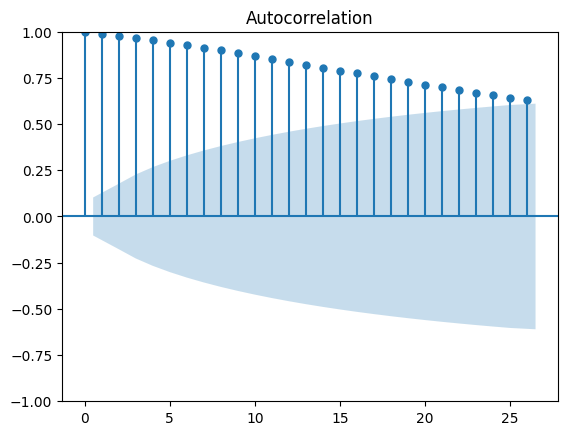

In [395]:
acf_original = plot_acf(df_train)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


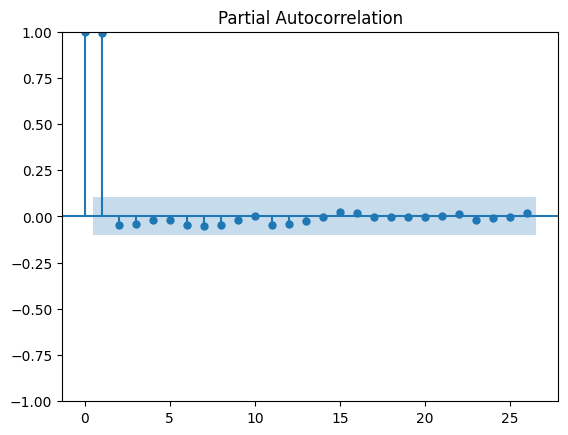

In [396]:
pacf_original = plot_pacf(df_train)

## ADF Test

In [397]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.24126116082883475


In [398]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [399]:
Prueba_Dickey_Fuller(df['traffic'],'traffic')

Resultados de la prueba de Dickey-Fuller para columna: traffic
Test Statistic                         -2.186902
p-value                                 0.211034
No Lags Used                           17.000000
Número de observaciones utilizadas    375.000000
Critical Value (1%)                    -3.447909
Critical Value (5%)                    -2.869278
Critical Value (10%)                   -2.570892
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


In [400]:
Prueba_Dickey_Fuller(df_train['traffic'],'traffic')

Resultados de la prueba de Dickey-Fuller para columna: traffic
Test Statistic                         -2.108122
p-value                                 0.241261
No Lags Used                           16.000000
Número de observaciones utilizadas    346.000000
Critical Value (1%)                    -3.449392
Critical Value (5%)                    -2.869930
Critical Value (10%)                   -2.571240
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


<Axes: >

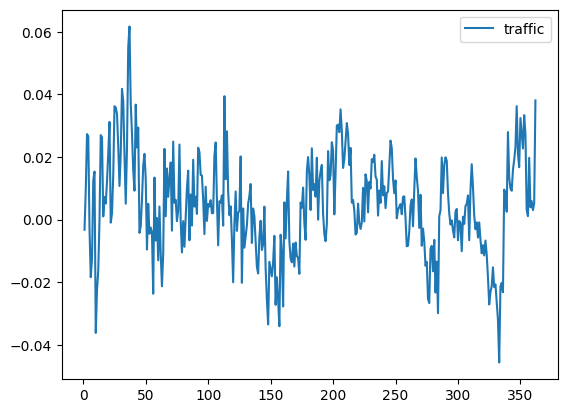

In [401]:
df_train_diff=df_train.diff().dropna()
df_train_diff.plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


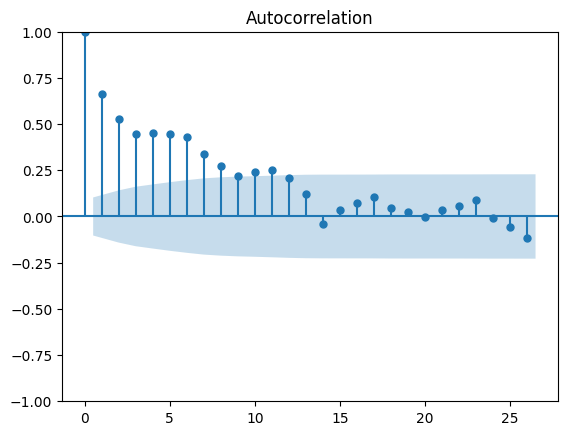

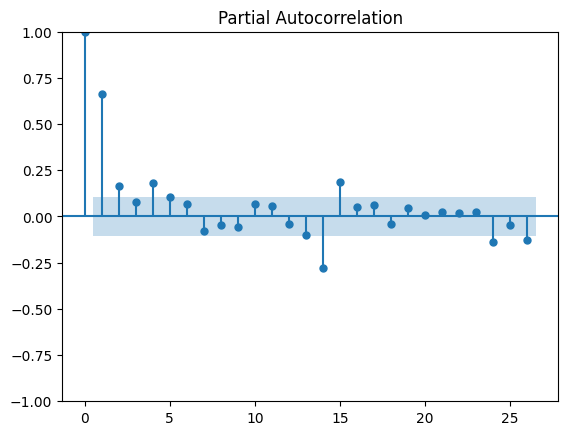

In [402]:
acf_diff=plot_acf(df_train_diff)
pacf_diff=plot_pacf(df_train_diff)

In [403]:
Prueba_Dickey_Fuller(df_train_diff['traffic'],'traffic')

Resultados de la prueba de Dickey-Fuller para columna: traffic
Test Statistic                         -3.165676
p-value                                 0.022059
No Lags Used                           15.000000
Número de observaciones utilizadas    346.000000
Critical Value (1%)                    -3.449392
Critical Value (5%)                    -2.869930
Critical Value (10%)                   -2.571240
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


## ARIMA MODEL (P,D,Q)

In [404]:
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  363
Model:                 ARIMA(2, 1, 0)   Log Likelihood                1096.369
Date:                Sat, 06 May 2023   AIC                          -2186.737
Time:                        23:13:51   BIC                          -2175.063
Sample:                             0   HQIC                         -2182.096
                                - 363                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5806      0.050     11.662      0.000       0.483       0.678
ar.L2          0.1687      0.058      2.903      0.004       0.055       0.283
sigma2         0.0001   8.23e-06     16.612      0.0

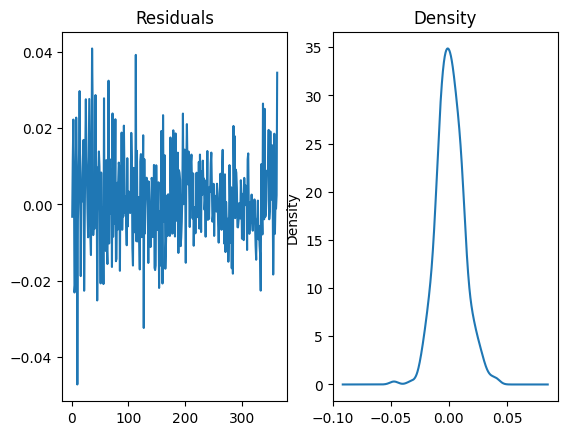

In [405]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


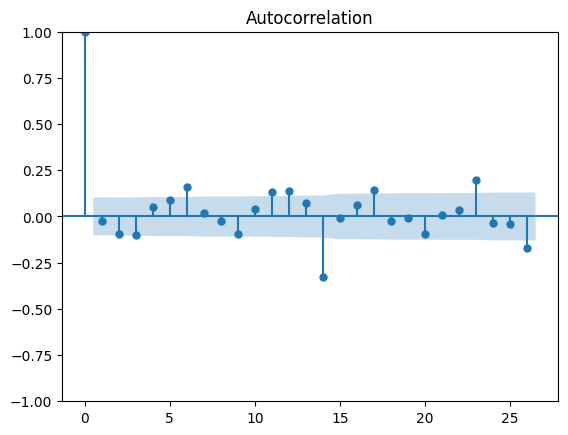

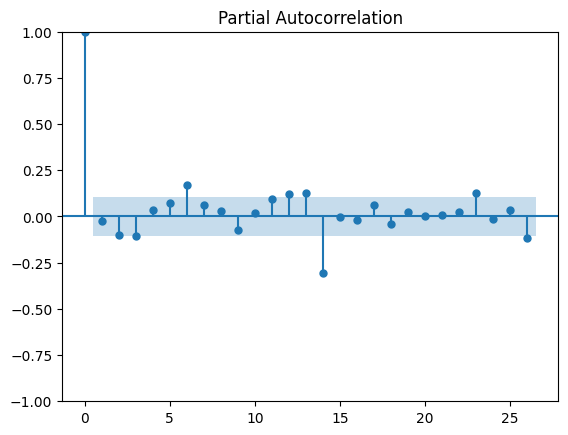

In [406]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<Axes: >

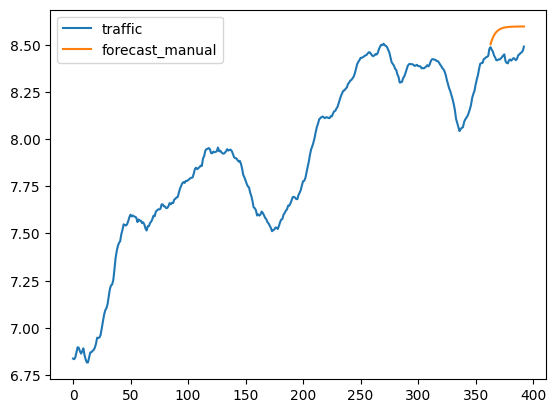

In [407]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()

## Auto Arina

In [408]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
auto_arima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2195.771, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1971.588, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2182.366, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2097.740, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1944.925, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2197.233, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2149.836, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2192.328, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2197.342, Time=1.41 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2160.200, Time=1.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-2196.508, Time=1.71 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-2198.338, Time=0.94 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-2165.776, Time=0.87 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-2197.629, Time=0.84 sec
 ARIMA(1,1,5)(0,0,0

ARIMA(order=(1, 1, 4), scoring_args={}, suppress_warnings=True)

In [409]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  363
Model:               SARIMAX(1, 1, 4)   Log Likelihood                1106.169
Date:                Sat, 06 May 2023   AIC                          -2198.338
Time:                        23:14:06   BIC                          -2171.096
Sample:                             0   HQIC                         -2187.508
                                - 363                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.000      1.385      0.166      -0.000       0.001
ar.L1          0.8942      0.040     22.137      0.000       0.815       0.973
ma.L1         -0.3784      0.071     -5.312      0.000      -0.518      -0.239
ma.L2         -0.1084      0.064     -1.690      0.091      -0.234       0.017
ma.L3         -0.0910      0.058     -1.562      0.118      -0.205       0.023
ma.L4          0.1014      0.052      1.954      0.051      -0.000       0.203
sigma2         0.0001   8.53e-06     15.166      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                13.15
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

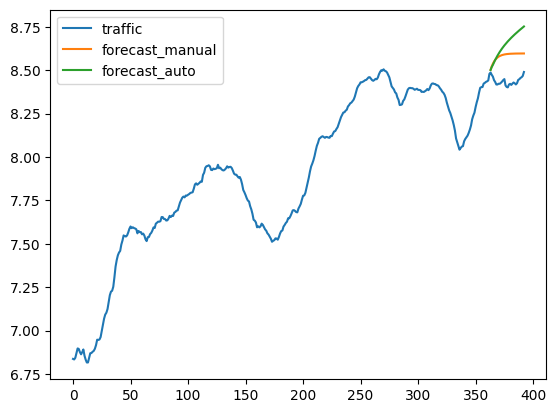

In [410]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)
df.plot()

In [411]:
mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {mae.round(4)}')
print(f'mape - manual: {mape.round(4)}')
print(f'rmse - manual: {rmse.round(4)}')

mae - manual: 0.1451
mape - manual: 0.0172
rmse - manual: 0.1505


In [412]:
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - auto: {mae.round(4)}')
print(f'mape - auto: {mape.round(4)}')
print(f'rmse - auto: {rmse.round(4)}')

mae - auto: 0.2139
mape - auto: 0.0254
rmse - auto: 0.2275


# Arima - Stockmarket 

In [441]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import pmdarima as pm
from pmdarima.datasets.stocks import load_msft
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
import plotly.express as px

In [414]:
df = load_msft()
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [415]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
7978,2017-11-06,84.20,84.700,84.0825,84.47,19852151,0
7979,2017-11-07,84.77,84.900,83.9300,84.26,17927878,0
7980,2017-11-08,84.14,84.610,83.8300,84.56,18029584,0
7981,2017-11-09,84.11,84.270,82.9000,84.09,21175384,0
7982,2017-11-10,83.79,84.095,83.2300,83.87,19396301,0


In [453]:
def line(df,name):
  fig=px.line(df,x='Date',y=['Open','Close'],title='{}'.format(name),template='plotly_dark')
  fig.show()
line(df,'Microsoft')

In [446]:
def price(df,name):
  fig=px.histogram(df,x='Date',y=['Open','Close'],
                   template='plotly_dark',
                   color_discrete_sequence=['pink','snow'],
                   title='{} Opening & Close Price'.format(name)
                   )
  fig.update_layout(
      xaxis_title='Date',
      yaxis_title='Stock Price'
  )
  fig.show()

price(df,'MSFT')

In [452]:
def high_low(df,cmp):
  df['Daily Range']=df['High']-df['Low']
  fig=px.line(df,x='Date',y='Daily Range',
              template='plotly_dark',
              color_discrete_sequence=['orangered'],
              title='Daily Stock Price Range for' +cmp
              )
  fig.update_layout(
      xaxis_title='Date',
      yaxis_title='Daily Trading Range'
  )
  fig.show()
high_low(df,'Microsoft')

In [416]:
train_df,test_df=df[:int(len(df)*0.8)],df[int(len(df)*0.8):]

In [417]:
train_df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


In [418]:
test_df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
6386,2011-07-12,22.450,22.612,22.229,22.400,56023648,0
6387,2011-07-13,22.471,22.756,22.375,22.478,48401988,0
6388,2011-07-14,22.471,22.798,22.250,22.342,54928592,0
6389,2011-07-15,22.351,22.733,22.342,22.606,58143209,0
6390,2011-07-18,22.493,22.706,22.165,22.445,52694113,0


In [419]:
train_df_value=train_df['Open'].values
test_df_value=test_df['Open'].values

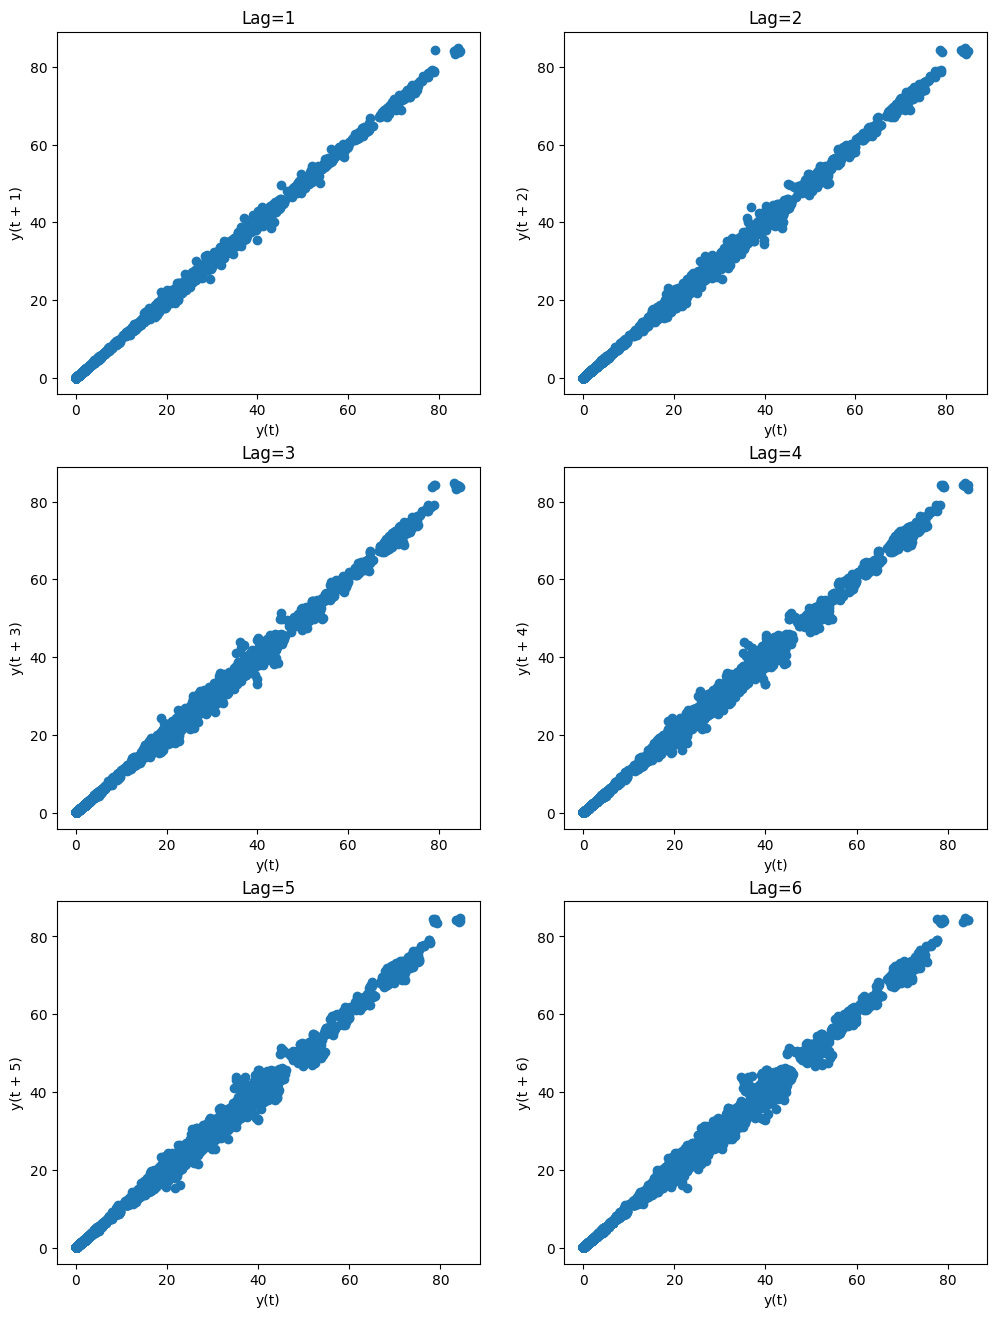

In [420]:
def lag_figure(df):
  from pandas.plotting import lag_plot
  fig, axes = plt.subplots(3, 2, figsize=(12, 16))
  plt.title('MSFT Autocorrelation plot')
  ax_idcs = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1),
    (2, 0),
    (2, 1)
  ]

  for lag, ax_coords in enumerate(ax_idcs, 1):
    ax_row, ax_col = ax_coords
    axis = axes[ax_row][ax_col]
    lag_plot(df, lag=lag, ax=axis)
    axis.set_title(f"Lag={lag}")
    
  plt.show()
################################################3
lag_figure(df['Open'])


In [421]:
from pmdarima.arima import ndiffs

kpss_diffs = ndiffs(train_df_value, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(train_df_value, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 1


In [422]:
auto = pm.auto_arima(train_df_value, d=n_diffs, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5642.904, Time=6.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5640.878, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5640.426, Time=1.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5640.350, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5639.441, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5640.152, Time=4.52 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 14.226 seconds


In [423]:
auto

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [424]:
auto.order

(0, 1, 0)

In [425]:
model = auto

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in test_df_value:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)
    
    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)
    
print(f"Mean squared error: {mean_squared_error(test_df_value, forecasts)}")
print(f"SMAPE: {smape(test_df_value, forecasts)}")

Mean squared error: 0.34238951346274255
SMAPE: 0.9825490519101435


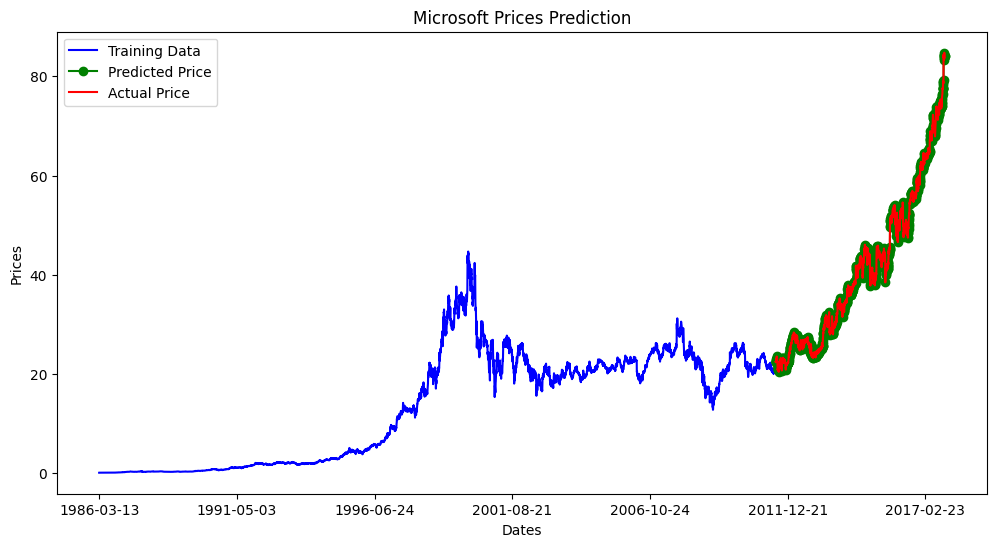

In [435]:
def actual_predicted(train_df_value,test_df):
  fig,plt.subplots(figsize=(12, 6))
  plt.plot(train_df_value, color='blue', label='Training Data')
  plt.plot(test_df.index, forecasts, color='green', marker='o',
              label='Predicted Price')

  plt.plot(test_df.index, test_df_value, color='red', label='Actual Price')
  plt.title('Microsoft Prices Prediction')
  plt.xlabel('Dates')
  plt.ylabel('Prices')

  plt.xticks(np.arange(0, 7982, 1300).tolist(), df['Date'][0:7982:1300].tolist())
  plt.legend()

actual_predicted(train_df_value,test_df)

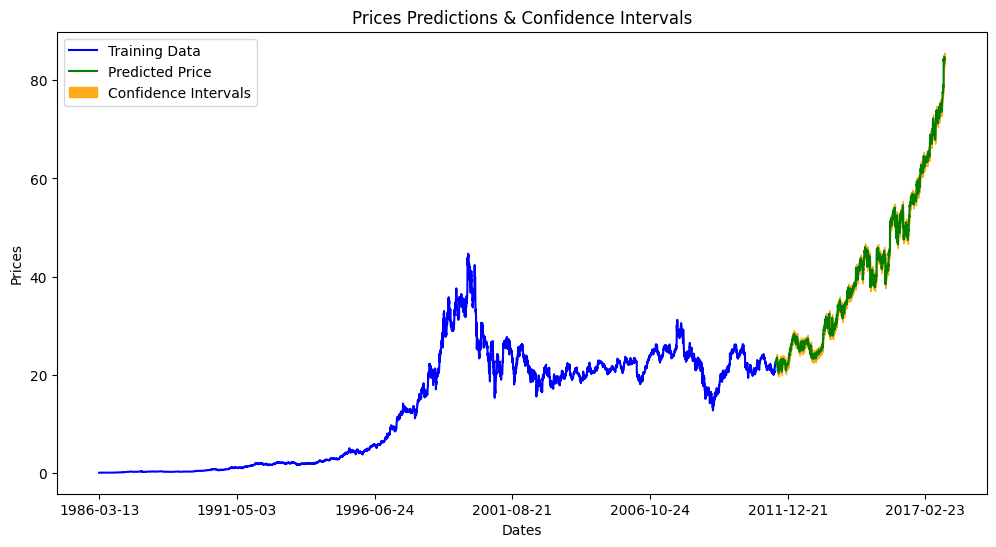

In [440]:
def predicted(train_df_value,test_df):
  fig,plt.subplots(figsize=(12, 6))
  plt.plot(train_df_value, color='blue', label='Training Data')
  plt.plot(test_df.index, forecasts, color='green',
              label='Predicted Price')

  plt.title('Prices Predictions & Confidence Intervals')
  plt.xlabel('Dates')
  plt.ylabel('Prices')

  conf_int = np.asarray(confidence_intervals)
  plt.fill_between(test_df.index,
                      conf_int[:, 0], conf_int[:, 1],
                      alpha=0.9, color='orange',
                      label="Confidence Intervals")

  plt.xticks(np.arange(0, 7982, 1300).tolist(), df['Date'][0:7982:1300].tolist())
  plt.legend()

predicted(train_df_value,test_df)